In [174]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [215]:
n = 1000
X , y = make_gaussian_quantiles(
    mean=None,
    cov=0.1,
    n_samples=n,
    n_features=2,
    n_classes=2,
    shuffle=True,
    random_state=None
)

In [216]:
y = y[:,np.newaxis]
y.shape

(1000, 1)

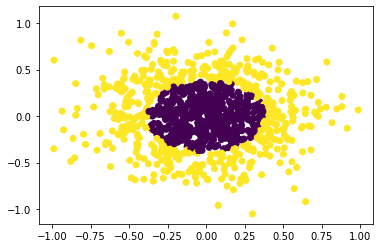

In [217]:
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.viridis)
plt.show()

# Crear el modelo

## Funciones de activacition 

In [218]:
def sigmoide(x, derivate=False):
    if derivate:
        return np.exp(-x) / ( (np.exp(-x) + 1)**2 )
    else:
        return 1 / (1 + np.exp(-x))

def relu(x, derivate=False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:
        return np.maximum(0,x)

## Funciones de perdida

In [219]:
def mse(y, y_hat, derivate=False):
    if derivate:
        return (y_hat - y)
    else:
        return np.mean((y_hat - y)**2)

## Pesos  

In [220]:
def neurona_dim_start(layers_dim):
    parameters = {}
    L = len(layers_dim)
    # Crear los pesos de manera aleatoria
    for l in range(L-1):
        parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1])*2) - 1 #Lo multiplico por dos y le resto uno para que los datos queden en un rango de -1, 1
        parameters['b'+str(l+1)] = (np.random.rand(1, layers_dim[l+1]) * 2) - 1
    return parameters

In [221]:
d = [2,4,8,1]

In [222]:
parameters = neurona_dim_start(d)
parameters

{'W1': array([[-0.61722444,  0.6012958 ,  0.64358967,  0.57844138],
        [ 0.85943771, -0.3397947 , -0.39301259, -0.34923918]]),
 'b1': array([[-0.34160013, -0.89862812, -0.76561719,  0.08205855]]),
 'W2': array([[ 0.34364562, -0.87050606, -0.38004054,  0.01640708, -0.99432645,
         -0.31913344, -0.95116126,  0.50785569],
        [ 0.63442364, -0.78550937,  0.70907122, -0.23195048,  0.03981298,
         -0.29566104, -0.39904921, -0.50694587],
        [ 0.46427575,  0.19601541,  0.36746221,  0.48527596, -0.07680254,
          0.28451604, -0.78437622, -0.42015849],
        [ 0.05318026, -0.95645858,  0.54545084,  0.44175518, -0.54543972,
         -0.06296666,  0.80508849,  0.42428245]]),
 'b2': array([[-0.76942724,  0.22806765,  0.43314042, -0.56396481,  0.88483571,
         -0.4150234 , -0.8303464 ,  0.51928898]]),
 'W3': array([[-0.76730119],
        [ 0.763704  ],
        [ 0.43978962],
        [-0.09616773],
        [-0.33980501],
        [-0.73723593],
        [ 0.85463994],


## Operacion (For ward)

In [223]:
d

[2, 4, 8, 1]

In [224]:
X.shape

(1000, 2)

In [225]:
parameters['W1'].shape

(2, 4)

In [226]:
parameters['A0'] = X

parameters['Z1'] = parameters['A0'] @ parameters['W1'] + parameters['b1']
parameters['A1'] = relu(parameters['Z1'])

parameters['Z2'] = parameters['A1'] @ parameters['W2'] + parameters['b2']
parameters['A2'] = relu(parameters['Z2'])

parameters['Z3'] = parameters['A2'] @ parameters['W3'] + parameters['b3']
parameters['A3'] = sigmoide(parameters['Z3'])

output = parameters['A3']

In [227]:
output

array([[0.28600649],
       [0.27036513],
       [0.28800752],
       [0.25985201],
       [0.27133387],
       [0.2732861 ],
       [0.25849746],
       [0.25867975],
       [0.26063071],
       [0.25931891],
       [0.25803762],
       [0.28701558],
       [0.28800752],
       [0.24074743],
       [0.27469514],
       [0.2573009 ],
       [0.26780291],
       [0.27267014],
       [0.27714048],
       [0.25928273],
       [0.26386107],
       [0.28800752],
       [0.27347595],
       [0.27445804],
       [0.26530751],
       [0.28053274],
       [0.28033121],
       [0.26820068],
       [0.28028007],
       [0.2751971 ],
       [0.27591049],
       [0.28800752],
       [0.2802137 ],
       [0.25974796],
       [0.28800752],
       [0.26500285],
       [0.27740204],
       [0.25772148],
       [0.25861304],
       [0.26150938],
       [0.27571418],
       [0.27751202],
       [0.28800752],
       [0.26170081],
       [0.27423956],
       [0.25791124],
       [0.26951309],
       [0.270

## Back propagation

<img src='data//backpropagation.png' width=500px>
<img src='data//backpropagation_layer.png' width=500px>

$$\Large\delta[l]$$

In [228]:
# Última capa
parameters['dZ3'] = mse(y,output, derivate=True) * sigmoide(parameters['A3'], derivate=True)
parameters['dW3'] = parameters['A2'].T @ parameters['dZ3']

$$\Large\delta[l - 1]$$

In [229]:
# Cada 2
parameters['dZ2'] =( parameters['dZ3'] @ parameters['W3'].T) * relu(parameters['A2'], derivate=True)
parameters['dW2'] = parameters['A1'].T @ parameters['dZ2']

# Cada 1
parameters['dZ1'] =( parameters['dZ2'] @ parameters['W2'].T) * relu(parameters['A1'], derivate=True)
parameters['dW1'] = parameters['A0'].T @ parameters['dZ1'] 

## Gradiant Descent

$$\Large W:W-\alpha\nabla$$

In [230]:
lr = 0.01
parameters['W3'] = parameters['W3'] - (parameters['dW3'] * lr)
parameters['b3'] = parameters['b3'] - (np.mean(parameters['dW3'],keepdims=True) * lr)

parameters['W2'] = parameters['W2'] - (parameters['dW2'] * lr)
parameters['b2'] = parameters['b2'] - (np.mean(parameters['dW2'],keepdims=True) * lr)

parameters['W1'] = parameters['W1'] - (parameters['dW1'] * lr)
parameters['b2'] = parameters['b2'] - (np.mean(parameters['dW2'],keepdims=True) * lr)

## Función

In [231]:
def train(data, lr, parameters, train = True):
    # FORD WARD
    parameters['A0'] = data

    parameters['Z1'] = parameters['A0'] @ parameters['W1'] + parameters['b1']
    parameters['A1'] = relu(parameters['Z1'])

    parameters['Z2'] = parameters['A1'] @ parameters['W2'] + parameters['b2']
    parameters['A2'] = relu(parameters['Z2'])

    parameters['Z3'] = parameters['A2'] @ parameters['W3'] + parameters['b3']
    parameters['A3'] = sigmoide(parameters['Z3'])

    output = parameters['A3']
    
    if train:
    # BACK PROPAGATION
        #Capa 3
        parameters['dZ3'] = mse(y,output, derivate=True) * sigmoide(parameters['A3'], derivate=True)
        parameters['dW3'] = parameters['A2'].T @ parameters['dZ3']
        # Capa 2
        parameters['dZ2'] =( parameters['dZ3'] @ parameters['W3'].T) * relu(parameters['A2'], derivate=True)
        parameters['dW2'] = parameters['A1'].T @ parameters['dZ2']
        # Capa 1
        parameters['dZ1'] =( parameters['dZ2'] @ parameters['W2'].T) * relu(parameters['A1'], derivate=True)
        parameters['dW1'] = parameters['A0'].T @ parameters['dZ1'] 

    # GRADIAND 
        parameters['W3'] = parameters['W3'] - parameters['dW3'] * lr
        parameters['b3'] = parameters['b3'] - (np.mean(parameters['dZ3'],axis =0,keepdims=True) * lr)

        parameters['W2'] = parameters['W2'] - (parameters['dW2'] * lr)
        parameters['b2'] = parameters['b2'] - (np.mean(parameters['dZ2'],axis =0,keepdims=True) * lr)

        parameters['W1'] = parameters['W1'] - (parameters['dW1'] * lr)
        parameters['b1'] = parameters['b1'] - (np.mean(parameters['dZ1'],axis =0,keepdims=True) * lr)
        
    
    return output

## Ejecutar

In [232]:
layers_dim = [2,4,8,1]
params = neurona_dim_start(layers_dim)
lr = 0.0001
erros = []

for i in range(80000):
    output = train(X, lr, params)
    
    if i % 25 == 0:
        print(mse(y,output))
        erros.append(mse(y,output))


0.25065567310001874
0.250480526585714
0.25032466143284565
0.2501824596238711
0.25004921567627675
0.24992531121943687
0.24980662754098654
0.24969167495846806
0.24957971796101494
0.24946952474729614
0.2493592598181101
0.24924962026448605
0.24913957664726138
0.24902869927048654
0.24891663981559525
0.24880367936724784
0.2486893948863857
0.24857344549472407
0.2484564747993447
0.2483375091323798
0.2482161148317012
0.24809207394352673
0.2479647545974923
0.24783372499656414
0.24769953767903957
0.24756257024371553
0.24742193886403538
0.24727777817802657
0.24712951407173528
0.2469748547262929
0.2468144326342679
0.24664505427895397
0.24646911992160073
0.2462771733093074
0.2460241753786251
0.24555038363428666
0.2450355875757869
0.24470025732249717
0.24438064242200921
0.24405934268550059
0.24372899235228804
0.24338741721671614
0.24303283597538275
0.242666471733816
0.2422858712185239
0.24189429666181309
0.24148842756512437
0.24106957997967066
0.2406353683521751
0.24018902500525655
0.239725184391099


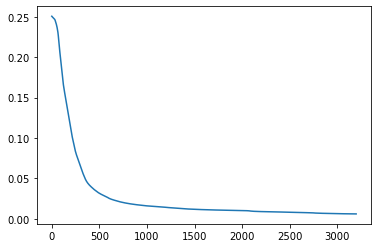

In [233]:
plt.plot(erros)

## Probar la red

In [234]:
data_test = (np.random.rand(1000,2) *2) -1
y_test  = train(data_test, 0.0001, params,train=False)

In [235]:
y_test = np.where(y_test >= 0.5,1,0)

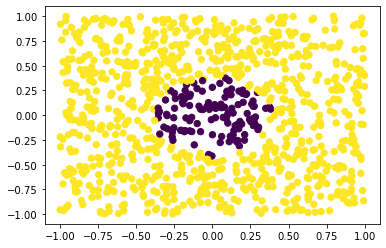

In [236]:
plt.scatter(data_test[:,0],data_test[:,1], c=y_test[:,0],s=40, cmap=plt.cm.viridis)
plt.show()

In [238]:
np.array(42).ndim

0